In [69]:
import sys  
sys.path.insert(0, '/Users/szczekulskij/side_projects/long-term-analysis-of-pws')
from src.generate_df import get_data_df
from src.utils import add_bucketed_time_column_to_df


import scipy.stats as stats
from statistics import mean as get_mean
from scipy.stats import ttest_rel as ttest_related
from scipy.stats import ttest_ind as ttest_not_related

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[0, 120, 240, 360]
['0 - 120', '120 - 240', '240 - 360', '360+']


/usr/local/lib/python3.10/site-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


,bucket,patients_per_bucket
0,0 - 120,208
1,120 - 240,88
2,240 - 360,25
3,360+,11


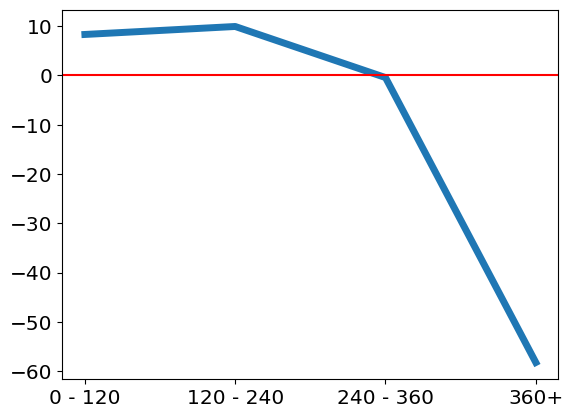

In [98]:
LINEWIDTH = 5
def graph_based_on_time_bucket(metric, agg_type = "mean", buckets_nr = 4, increment = 120):
    # Get data
    buckets = [i * increment for i in range(buckets_nr)]
    df = get_data_df(metric = metric)
    df = add_bucketed_time_column_to_df(df, buckets_nr = buckets_nr, increment = increment)
    grouped_by_bucket = df.groupby("bucket", as_index = False).agg(agg_type)
    x = np.array(list(grouped_by_bucket["bucket"]))
    y = list(grouped_by_bucket[metric])

    # Plot
    plt.plot(x, y, linewidth = LINEWIDTH)
    ticks_labels = [f"{buckets[i]} - {buckets[i+1]}" for i in range(len(buckets) - 1)]
    ticks_labels.append(f"{buckets[-1]}+")
    print(ticks_labels)
    plt.xticks(x, ticks_labels)
    plt.axhline(y=0, color='r', linestyle='-')
    ax = plt.gca()
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(14.5)

    # Calculate nr of patients per bucket
    grouped_by_bucket = df.groupby("bucket", as_index = False)
    patients_per_bucket = grouped_by_bucket[metric].count()
    patients_per_bucket.rename(columns = {metric : f'patients_per_bucket'}, inplace = True)
    patients_per_bucket["bucket"] = ticks_labels
    display(patients_per_bucket)
    
graph_based_on_time_bucket("inbetween_GCE")

In [ ]:
def get_labels(buckets_nr = 4, increment = 120):
    labels = []
    for i in range (buckets_nr):
        if i == 0 :
            label = f'{i} - {int(i * increment + increment/2)}'
        else : 
            label = f'{int(i * increment - increment/2) + 1} - {int(i * increment + increment/2)}'
        labels.append(label)
    return labels


def graph_based_on_time_bucket(metric, agg = 'mean', buckets_nr = 4, increment = 120):

    
    df = add_bucketed_time_column_to_df(df, buckets_nr = 4, increment = 120)


    grouped_by_visit = df.groupby(base_column, as_index = False).agg({'time' : agg, 'total_clearence_in_between_visits' : agg, 'total_clearence_in_respect_to_beginning' : agg}, as_index = False)
    time_groups = np.array(list(grouped_by_visit["group"]))
    aggregated_column = list(grouped_by_visit[column])
    plt.title(f"sredni mean clearence between visits {title}", fontsize=16)
    plt.plot(time_groups, aggregated_column, label = label, linewidth = LINEWIDTH)
    plt.xlabel('Days passed between two consecutive visits\n (clustered into buckets)', fontsize=16)
    
    try:
        plt.xticks(time_groups, get_labels(DEFAULT_GROUPS, increment))
    except:
        NEW_DEFAULT_GROUPS = []
        for index in time_groups:
            NEW_DEFAULT_GROUPS.append(DEFAULT_GROUPS[index])
        plt.xticks(time_groups, get_labels(NEW_DEFAULT_GROUPS, increment))


    if not skip_linear_fit:
        
        # Get lineary fit graph:
        # x = np.array(time_groups)
        # y = aggregated_column
        m, b = np.polyfit(time_groups, aggregated_column, 1)
        plt.plot(time_groups, m*time_groups + b, '--', linewidth = 2, linestyle = '--')
        # calculate the Pearson's correlation between two variables
        corr, _ = pearsonr(time_groups, aggregated_column)
        print(f'Pearsons correlation of the linear fit for {label}: %.3f' % corr, '(very bad practice though)')



    column_name = get_name(column)
    plt.ylabel(f'% mean improvement\n inbetween visits\n', fontsize=16)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.legend()


    # Return nr of patients_per_bucket
    grouped_by_visit = df.groupby(base_column, as_index = False)
    patients_per_bucket = grouped_by_visit['------------'].count()
    patients_per_bucket.rename(columns = {'------------' : f'patients_in_bucket {label}'}, inplace = True)
    patients_per_bucket[base_column] = patients_per_bucket[base_column] * increment

    # chi squared contigency test
    # chi_squared_test(df, GROUPS, increment, display_data_for_chi_square_test, name = label, column_name = base_column)
    # print()

    ax = plt.gca()
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(14.5)

    return patients_per_bucket